<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installation" data-toc-modified-id="Installation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Simple-object-example" data-toc-modified-id="Simple-object-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple object example</a></span><ul class="toc-item"><li><span><a href="#cpu" data-toc-modified-id="cpu-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cpu</a></span></li><li><span><a href="#gpu" data-toc-modified-id="gpu-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>gpu</a></span></li></ul></li><li><span><a href="#Object-bunch" data-toc-modified-id="Object-bunch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Object bunch</a></span><ul class="toc-item"><li><span><a href="#cpu" data-toc-modified-id="cpu-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>cpu</a></span></li><li><span><a href="#gpu" data-toc-modified-id="gpu-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>gpu</a></span></li></ul></li></ul></div>

# Installation

In [1]:
%cd ..
!ls

/data/ivpaharitonov/space_junk_simulator/space_junk_simulator
bin		   CMakeLists.txt  lib	      README.md  src
cmake-build-debug  docs		   notebooks  setup.py	 test


Cpu version

In [3]:
!python3 setup.py

Build CPU version
Using cpp files:  ['/src/cpu/cpu_solver.cpp', '/src/python_package/py_wrapper_cpu.cpp', '/src/model.cpp']
Success!


Gpu version

In [6]:
!python3 setup.py --GPU=True

Build CPU version
Using cpp files:  ['/src/cpu/cpu_solver.cpp', '/src/python_package/py_wrapper_cpu.cpp', '/src/model.cpp']
Success!
Build GPU version
GPU build success! /data/ivpaharitonov/space_junk_simulator/space_junk_simulator/src/python_package/build/python_package_gpu.so


# Simple object example

In [7]:
import numpy as np
x_init = np.array([25217.424362950926], dtype = np.float64)
y_init = np.array([-496457.41386781185], dtype = np.float64)
z_init = np.array([ 650671.2495281389], dtype = np.float64)

vx_init = np.array([0.0014348032818816137], dtype = np.float64)
vy_init = np.array([-0.00088002800475806], dtype = np.float64)
vz_init = np.array([-0.0007270622299984097], dtype = np.float64)

Simulation_time = 26784000 secs


## cpu

In [5]:
x0, y0, z0, vx0, vy0, vz0, x0 = x_init, y_init, z_init, vx_init, vy_init, vz_init, x_init

In [6]:
from src.python_package.space_junk_simulator import space_simulator
sim_cpu = space_simulator(gpu = False)

In [7]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_cpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, 
            vzsteps= int(10), timestep = float(1.0))

print('Initial', x0, y0, z0, vx0, vy0, vz0, '\n')
print('End', x_res, y_res, z_res, vx_res, vy_res, vz_res)

Initial [25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00072706] 

End [25029.50017982] [-492757.46281441] [645821.96784847] [-47.29803103] [931.18715794] [-1220.44246811]


In [8]:
import numpy as np
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline


def simulate(sim, 
             x0, y0, z0, 
             vx0, vy0, vz0, 
             simulation_steps=10, time_step=1.0, plot_result=False):
    simulation_history = []
    objects_steps = []
    if plot_result:
        plt.figure(figsize=(12,12))
        ax = plt.axes(projection='3d')
    for simulation_step in tqdm_notebook(range(simulation_steps)):

        x_res, y_res, z_res, vx_res, vy_res, vz_res = \
        sim.run(x0, y0, z0, vx0, vy0, vz0, 
                    x0.size,vzsteps= int(1), timestep = float(time_step))


        x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res
        if plot_result:
            ax.scatter3D( x_res, y_res, z_res)
    

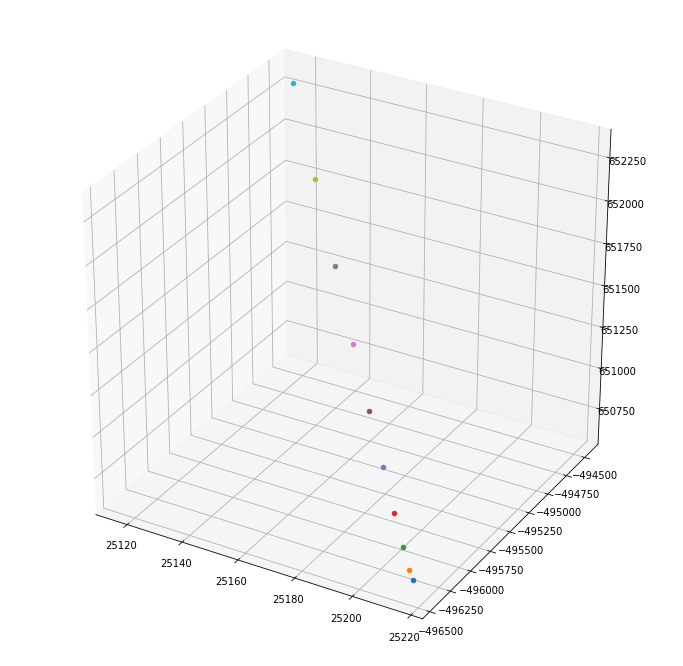

In [9]:
simulate(sim_cpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=10, time_step=1.0, plot_result=True)

## gpu

In [10]:
x0, y0, z0, vx0, vy0, vz0, x0 = x_init, y_init, z_init, vx_init, vy_init, vz_init, x_init

In [11]:
from src.python_package.space_junk_simulator import space_simulator
sim_gpu = space_simulator(gpu = True)

In [12]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_gpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(10), 
            timestep = float(1.0))

print('Initial', x0, y0, z0, vx0, vy0, vz0, '\n')
print('End', x_res, y_res, z_res, vx_res, vy_res, vz_res)

Initial [25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00072706] 

End [24290.67118081] [-478212.08092972] [626758.37559678] [-187.69167579] [3695.12708449] [-4842.94092718]


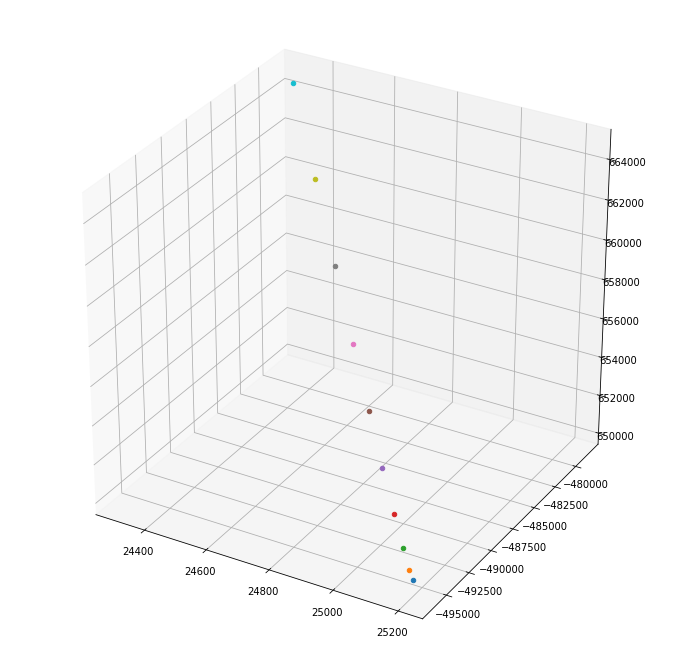

In [13]:
simulate(sim_gpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=10, time_step=1.0, plot_result=True)

check

In [14]:
sim_cpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, 
            vzsteps= int(10), timestep = float(1.0))\
==sim_gpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, 
            vzsteps= int(10), timestep = float(1.0))

False

In [15]:
break

SyntaxError: 'break' outside loop (<ipython-input-15-6aaf1f276005>, line 4)

# Object bunch

## cpu

In [ ]:
x0, y0, z0, vx0, vy0, vz0, x0 = \
x_batch_init, y_batch_init, z_batch_init, vx_batch_init, vy_batch_init, vz_batch_init, x_batch_init

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim_cpu = space_simulator(gpu = False)

In [ ]:
%%time
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_cpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(1), timestep = float(0.1))

In [ ]:
simulate(sim_cpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=1000, time_step=0.1)

## gpu

In [ ]:
x0, y0, z0, vx0, vy0, vz0, x0 = \
x_batch_init, y_batch_init, z_batch_init, vx_batch_init, vy_batch_init, vz_batch_init, x_batch_init

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim_gpu = space_simulator(gpu = True)

In [ ]:
%%time
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_gpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(1), timestep = float(0.1))

In [ ]:
simulation_time 

In [ ]:
simulate(sim_gpu, x0, y0, z0, vx0, vy0, vz0, 
        simulation_steps=1000, time_step=0.1)